C:\Users\Emre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Emre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


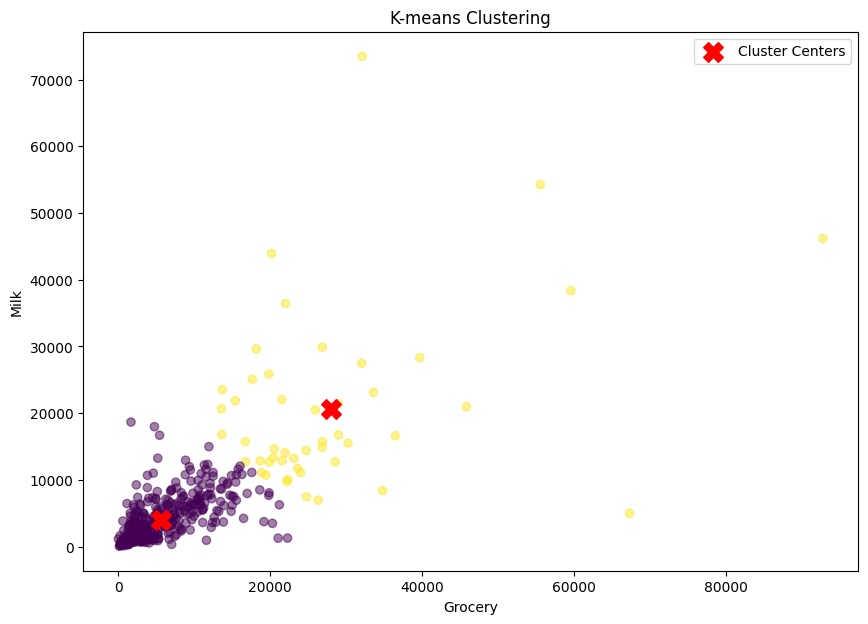

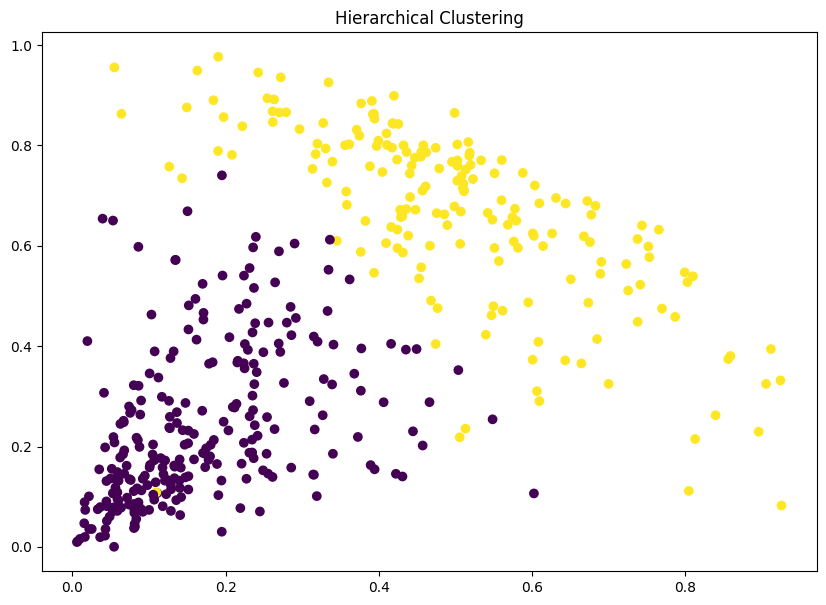

Doğruluk (Accuracy): 95.00%


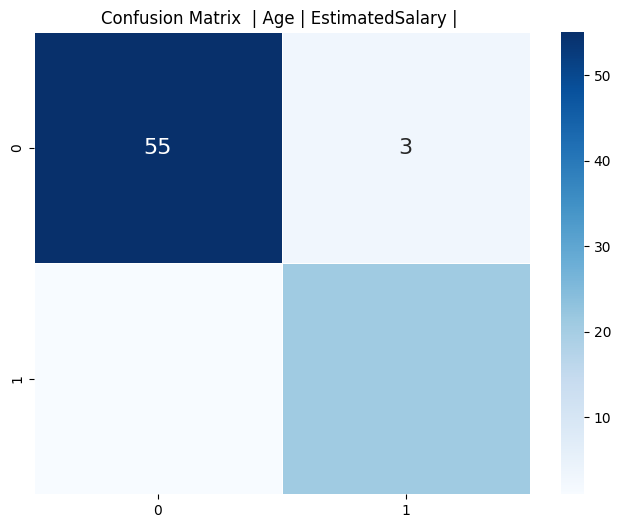

Doğruluk (Accuracy): 88.75%


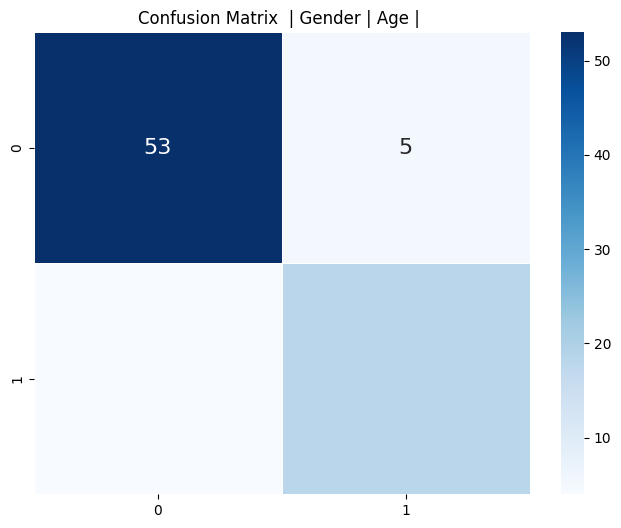

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('Wholesale customers data.csv')
data2 = pd.read_csv('Social_Network_Ads.csv')


def hierarchical(data_var):
    data_scaled = normalize(data_var)
    data_scaled = pd.DataFrame(data_scaled, columns=data_var.columns)

    cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
    cluster.fit_predict(data_scaled)

    plt.figure(figsize=(10, 7))
    plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)
    plt.title('Hierarchical Clustering')
    plt.show()


def k_means(data_var):
    selected_features = ['Grocery', 'Milk']
    x = data[selected_features]
    scaler = StandardScaler()
    x_normalized = scaler.fit_transform(x)
    kmeans = KMeans(n_clusters=2, random_state=42)
    data_var['Cluster'] = kmeans.fit_predict(x_normalized)
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

    plt.figure(figsize=(10, 7))
    plt.scatter(x['Grocery'], x['Milk'], c=data_var['Cluster'], cmap='viridis', alpha=0.5)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    plt.title('K-means Clustering')
    plt.xlabel('Grocery')
    plt.ylabel('Milk')
    plt.legend()
    plt.show()


def nn_classification(dataset):
    def do_the_thing(*args):
        args_arr = [i for i in args]

        if args_arr.__contains__(1):
            le = LabelEncoder()
            dataset['Gender'] = le.fit_transform(dataset['Gender'])

        x = dataset.iloc[:, args_arr].values
        y = dataset.iloc[:, -1].values

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
        classifier.fit(x_train, y_train)

        y_pred = classifier.predict(x_test)

        cm = confusion_matrix(y_test, y_pred)
        ac = accuracy_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        print("Doğruluk (Accuracy): {:.2f}%".format(accuracy * 100))

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

        vals = " | "
        for i in args_arr:
            vals += dataset.columns[i] + " | "

        plt.title(f'Confusion Matrix {vals}')
        plt.show()

        # True Positive (TP): Gerçekte pozitif olan örneklerin doğru bir şekilde pozitif olarak tahmin edilmesi.
        # True Negative (TN): Gerçekte negatif olan örneklerin doğru bir şekilde negatif olarak tahmin edilmesi.

        # False Positive (FP): Gerçekte negatif
        # olan örneklerin yanlış bir şekilde pozitif olarak tahmin edilmesi. (Tip I hata)

        # False Negative (FN): Gerçekte pozitif
        # olan örneklerin yanlış bir şekilde negatif olarak tahmin edilmesi. (Tip II hata)

        # [[TN, FP],
        #  [FN, TP]]

    
    do_the_thing(2, 3)
    do_the_thing(1,2)


k_means(data_var=data)
hierarchical(data_var=data)
nn_classification(dataset=data2)